# Python Seaborn

## What is Seaborn?

- Python Data Visualization Library - based on MatPlotLib 
- Used for plotting statistical graphs, identifying trends, relationships & outliers
- Seaborn is easier & faster to use (less code) Vs MatPlotLib
- https://seaborn.pydata.org/
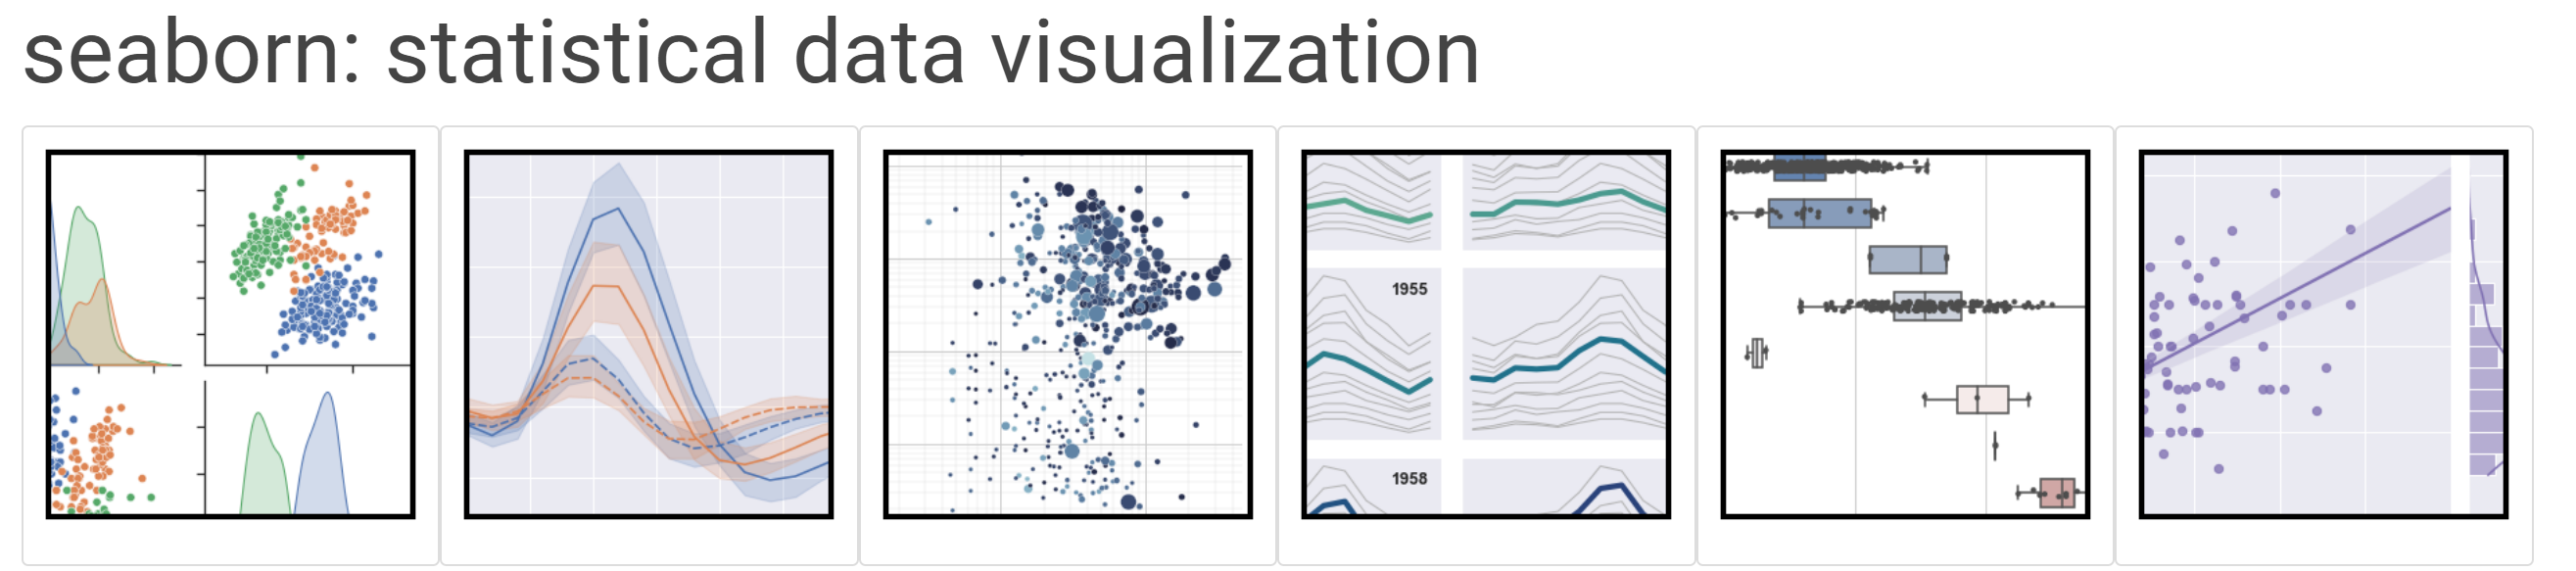

## Seaborn plots
- Trend Plots:
    - Line Plots
    
    
- Summary Plots:
    - Bar Plots
    
    
- Distribution of Data:
    - Histogram
    - Box Plots
    
    
- Relationship Plots
    - Scatter Plots
    - lmplot (combo of regplot() and FacetGrid)
    
    
- Holistic views / Combo:
    - Pair Plots
    - Join Plots
    
    
- Correlation / Relationships:
    - Heat Maps

## Importing / Installing packages



In [8]:

# To install seaborn type "pip install seaborn" to the anaconda terminal
#!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [9]:
warnings.simplefilter(action="ignore", 
                      category=FutureWarning)

## 1. Loading the Raw Data


In [4]:
# Loading the data
raw_data=pd.read_csv("Marketing.csv")
raw_data.head()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             182 non-null    object 
 1   Week             182 non-null    int64  
 2   Week_ID          182 non-null    int64  
 3   Month            182 non-null    int64  
 4   Month_ID         182 non-null    int64  
 5   Year             182 non-null    int64  
 6   Day_Name         182 non-null    object 
 7   Visitors         182 non-null    int64  
 8   Revenue          182 non-null    int64  
 9   Marketing Spend  182 non-null    float64
 10  Promo            182 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 15.8+ KB


## 2. Line Gragh
### Line chart is one of the most common and basic type of visualization used for visualizing continuous values against continuous variable such as time, distance, speed etc. 
seaborn.lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)
* The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters.
* https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [10]:
raw_data['Date']=pd.to_datetime(raw_data['Date'])

<AxesSubplot:xlabel='Week_ID', ylabel='Revenue'>

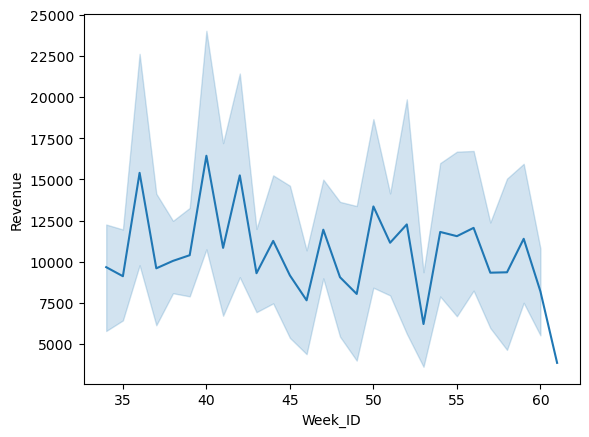

In [12]:
# Assuming we want to investigate the Revenue by week_ID
# Notes: error bands show the confidence interval
sns.lineplot(x="Week_ID",
            y="Revenue",
            data=raw_data)

<AxesSubplot:xlabel='Week_ID', ylabel='Revenue'>

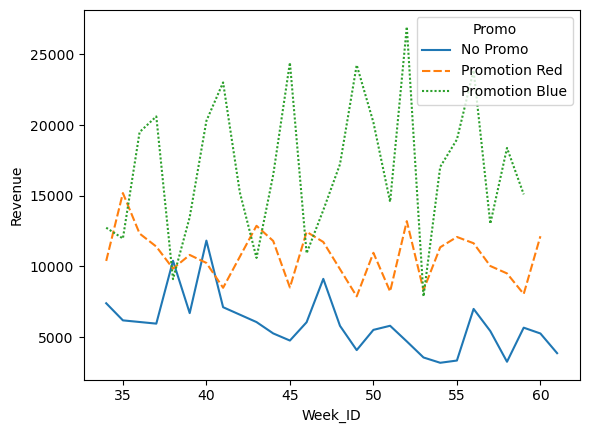

In [16]:
# Add another dimension (categorical data) 
#at hue and style and no error bar
sns.lineplot(x="Week_ID",
            y="Revenue",
             hue="Promo",
             ci=None,
             style="Promo",
            data=raw_data)

#### Investigate the revenue by month for each day

In [18]:
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

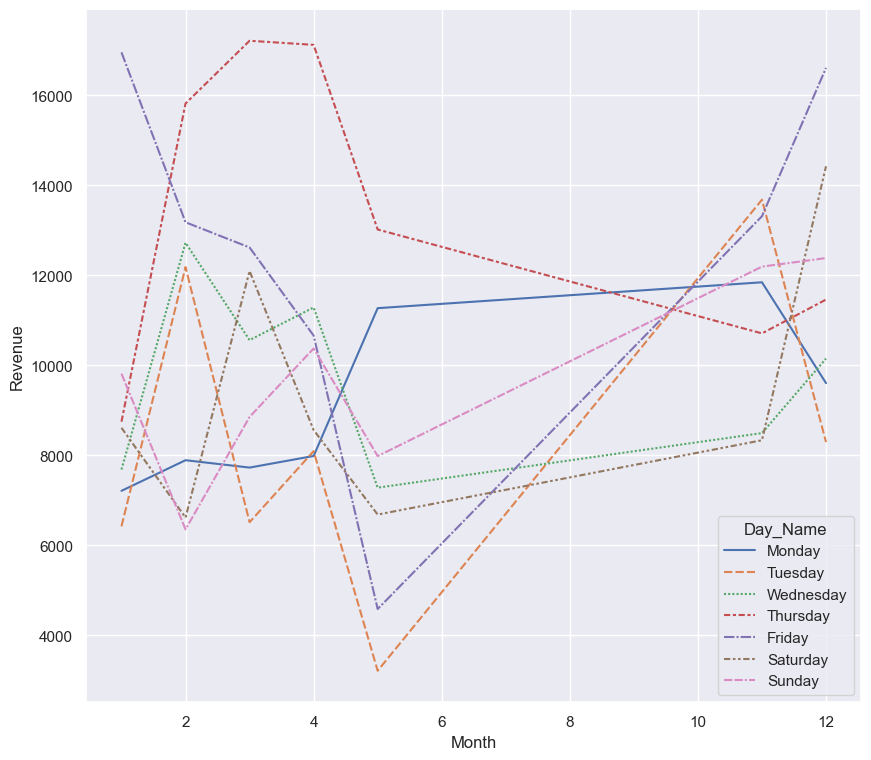

In [22]:
#increase the size
sns.set(rc={'figure.figsize':(10,9)})
sns.lineplot(x="Month",
            y="Revenue",
            hue="Day_Name",
            style="Day_Name",
            ci=None,
            data=raw_data)
plt.show()

## 3. Bar Plots

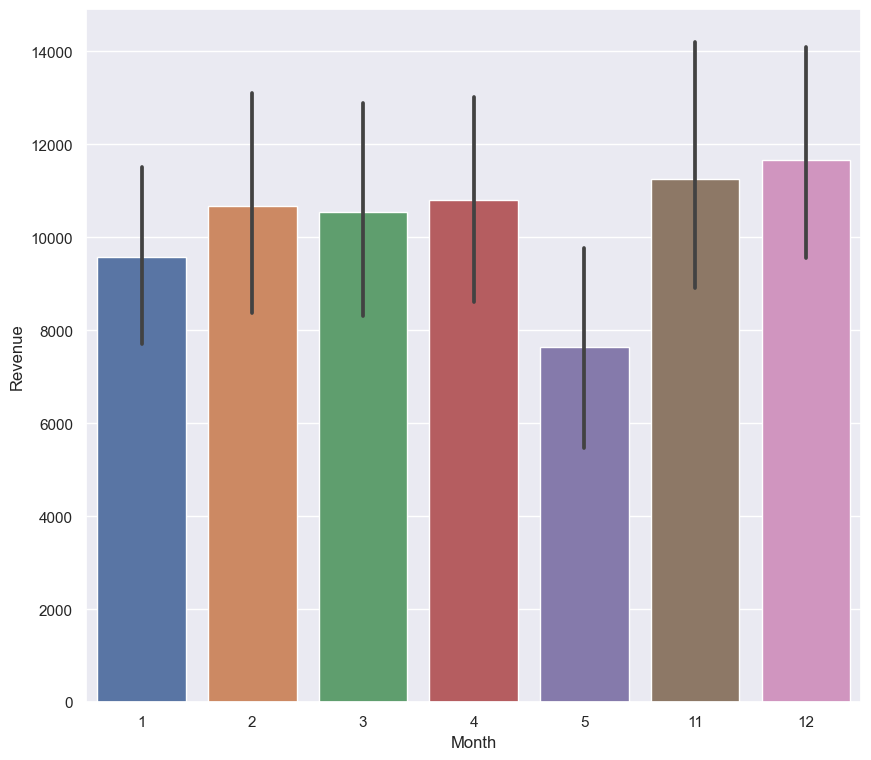

In [26]:
# Total Revenue by Month
sns.barplot(x="Month",
           y="Revenue",
           data=raw_data)

plt.show()

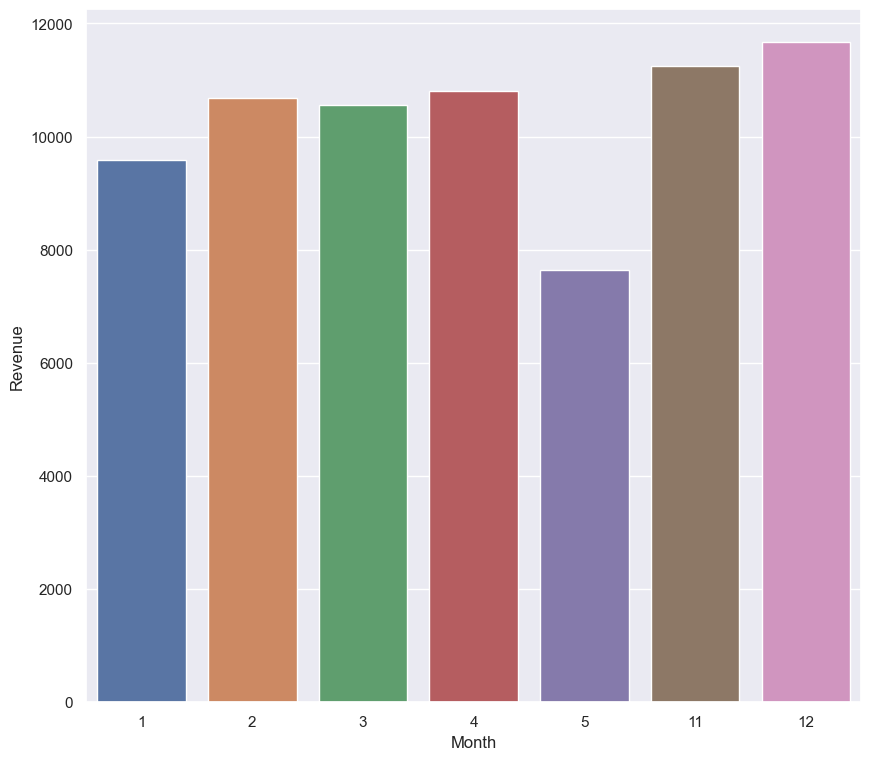

In [27]:
#Total Revenue by Month - Remove the Confidence Interval
sns.barplot(x="Month",
           y="Revenue",
            ci=None,
           data=raw_data)

plt.show()

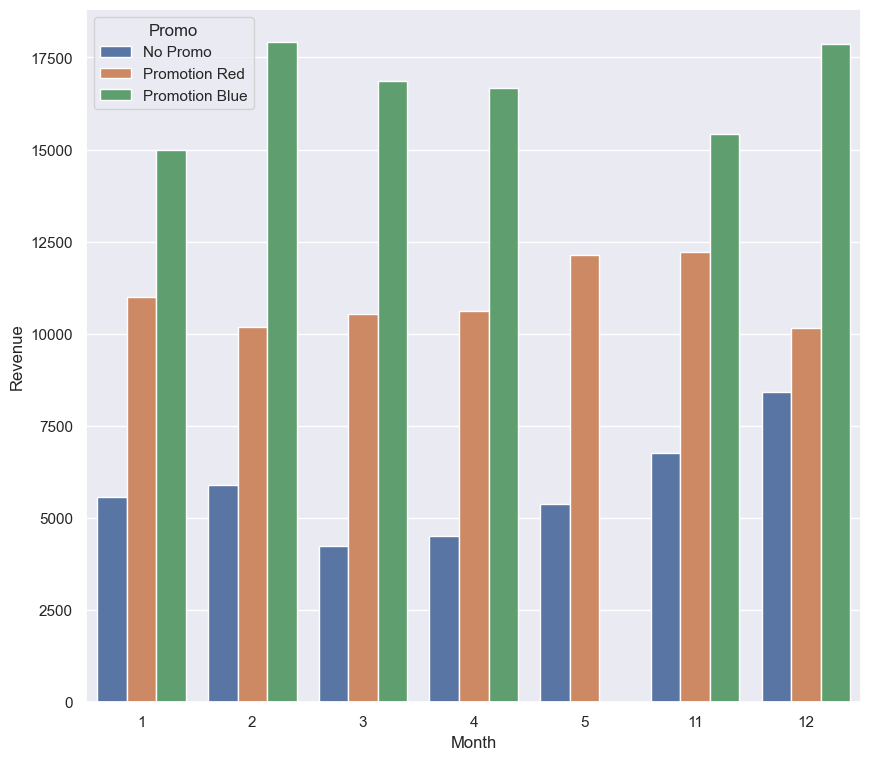

In [28]:
#Total Revenue by Month - By Promo application
sns.barplot(x="Month",
           y="Revenue",
            ci=None,
            hue="Promo",
           data=raw_data)

plt.show()

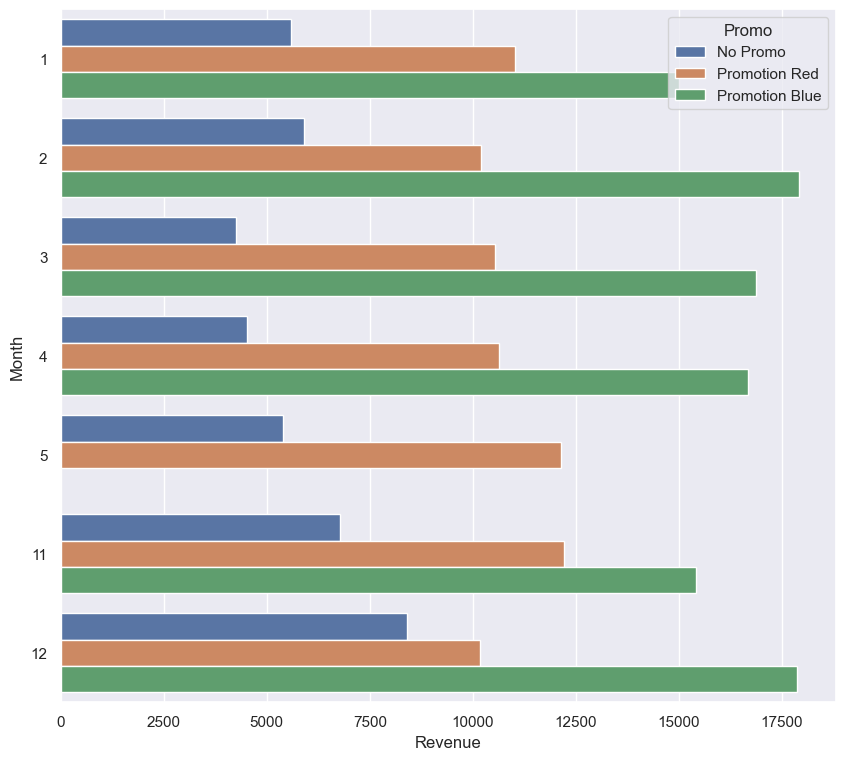

In [30]:
# Changing direction
sns.barplot(y="Month",
           x="Revenue",
            ci=None,
            hue="Promo",
            orient="h",
           data=raw_data)
plt.show()


## 4. Histograms

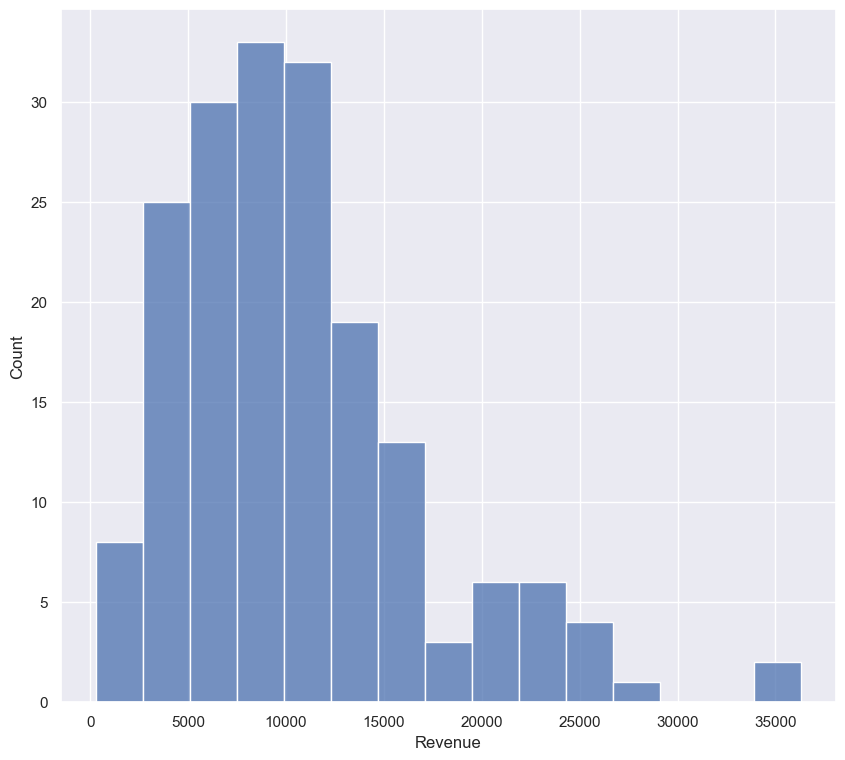

In [32]:
# Example 1 - Investigating the distribution of Revenue
sns.histplot(x="Revenue",
            data=raw_data)
plt.show()

Mean: 10581.593406593407, Median: 9452.0


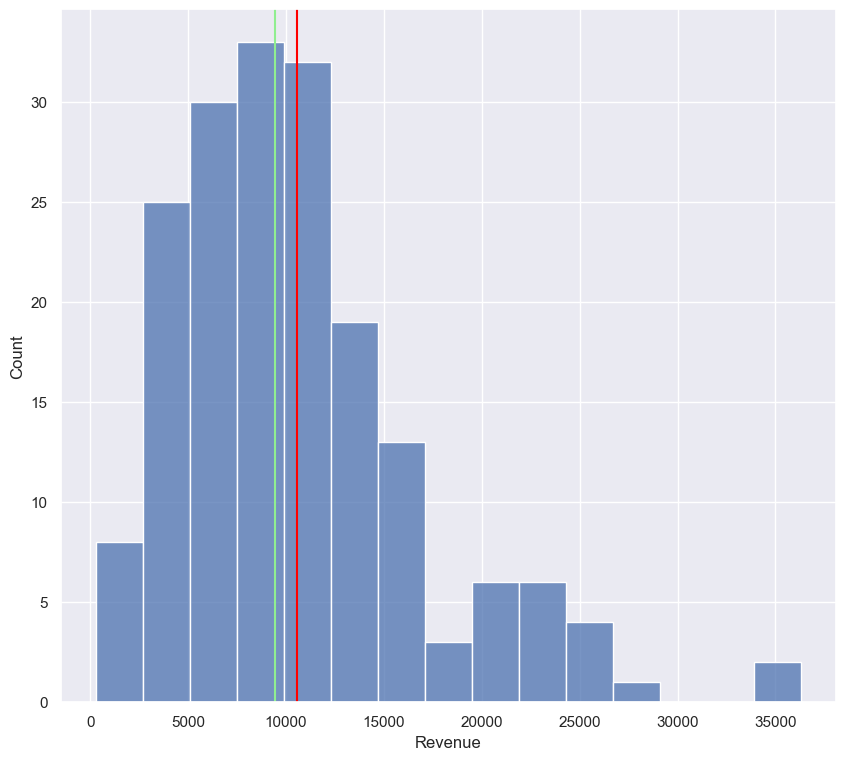

In [37]:
# Investigating the distribution of Revenue, adding the mean
sns.histplot(x="Revenue",
            data=raw_data)
mean=raw_data['Revenue'].mean()
median=raw_data['Revenue'].median()
print(f"Mean: {mean}, Median: {median}")
plt.axvline(mean, color="red")
plt.axvline(median, color= "lightgreen")
plt.show()

## 5. Box Plots
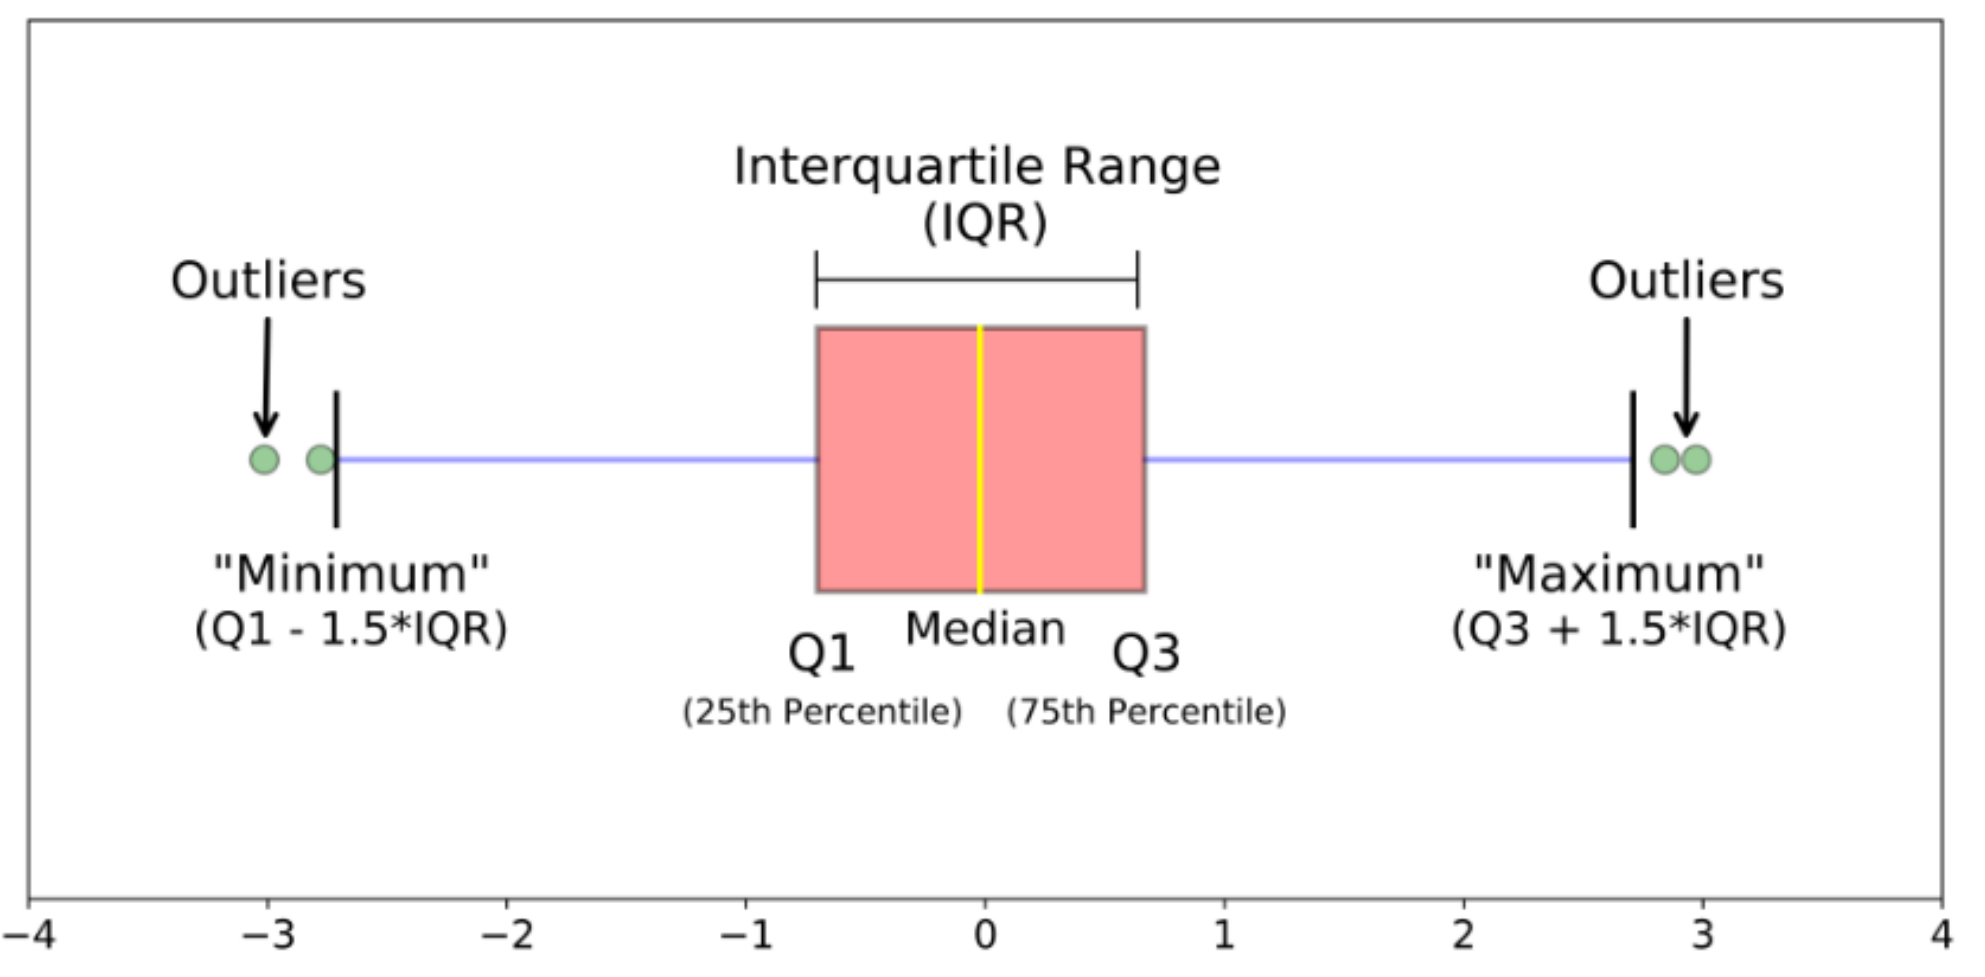

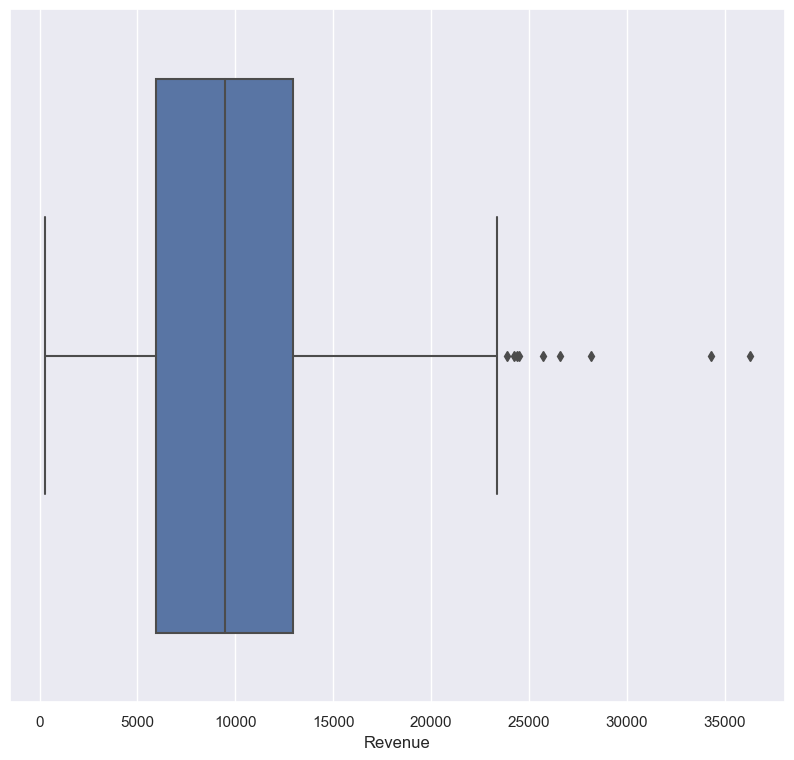

In [39]:
# Investigating the distribution of Revenue
sns.boxplot(x="Revenue",
           data=raw_data)
plt.show()

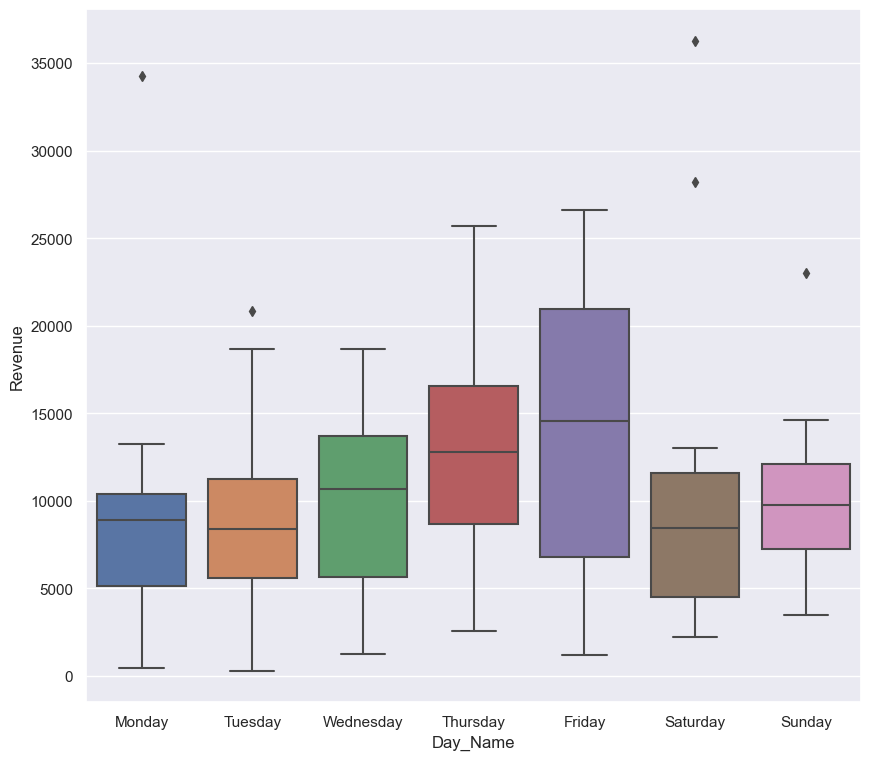

In [41]:
# Investigating the distribution of Revenue by Day
sns.boxplot(x="Day_Name",
           y="Revenue",
           data=raw_data)
plt.show()

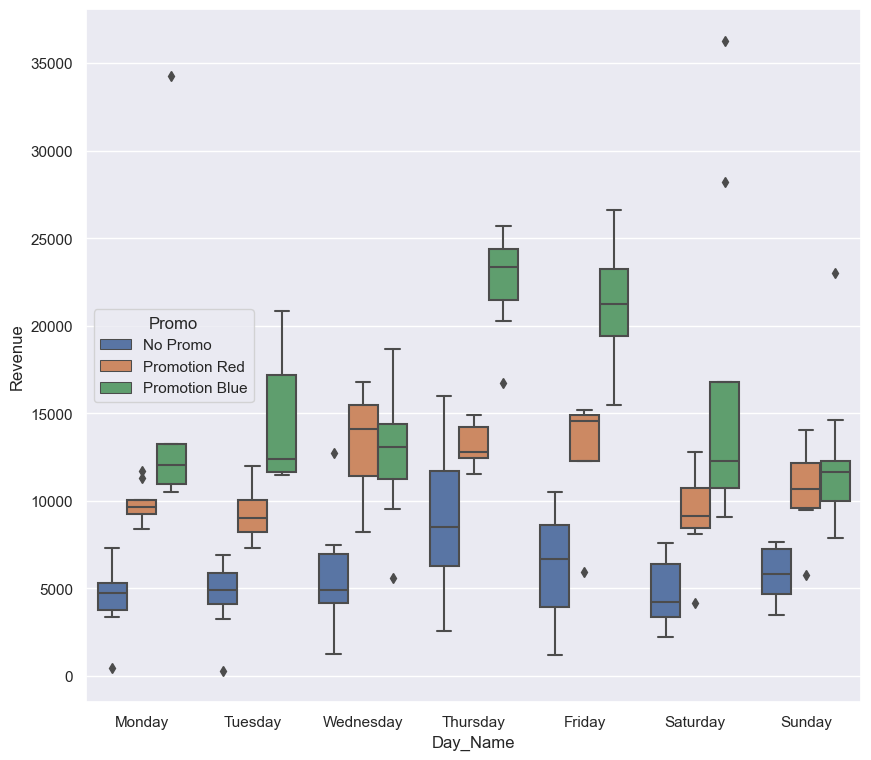

In [42]:
#Investigating the distribution of Revenue by Day- applying Promo
sns.boxplot(x="Day_Name",
           y="Revenue",
            hue="Promo",
           data=raw_data)
plt.show()

### More on Boxplots here:
https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

## 6. ScatterPlots

In [43]:
raw_data = pd.read_csv("Marketing.csv")
raw_data.head()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,9/11/2020,46,34,11,11,2020,Monday,707,465,651.375,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375,Promotion Blue
3,12/11/2020,46,34,11,11,2020,Thursday,1726,11712,1801.750,No Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500,No Promo


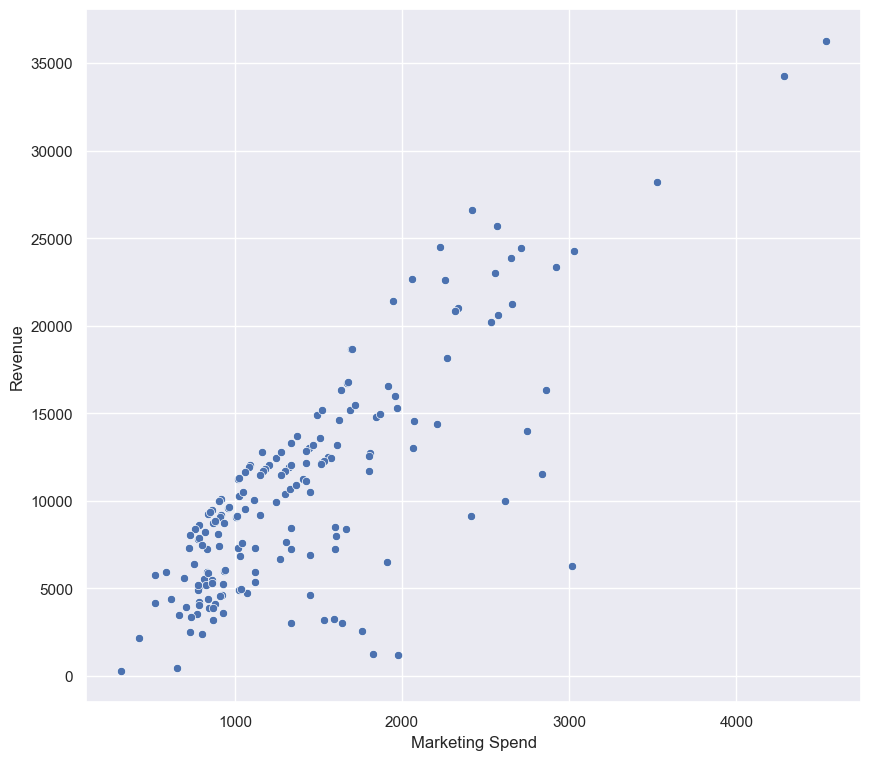

In [45]:
# Relationship between Marketing Spend and Revenue
sns.scatterplot(x="Marketing Spend",
               y="Revenue",
               data=raw_data)
plt.show()

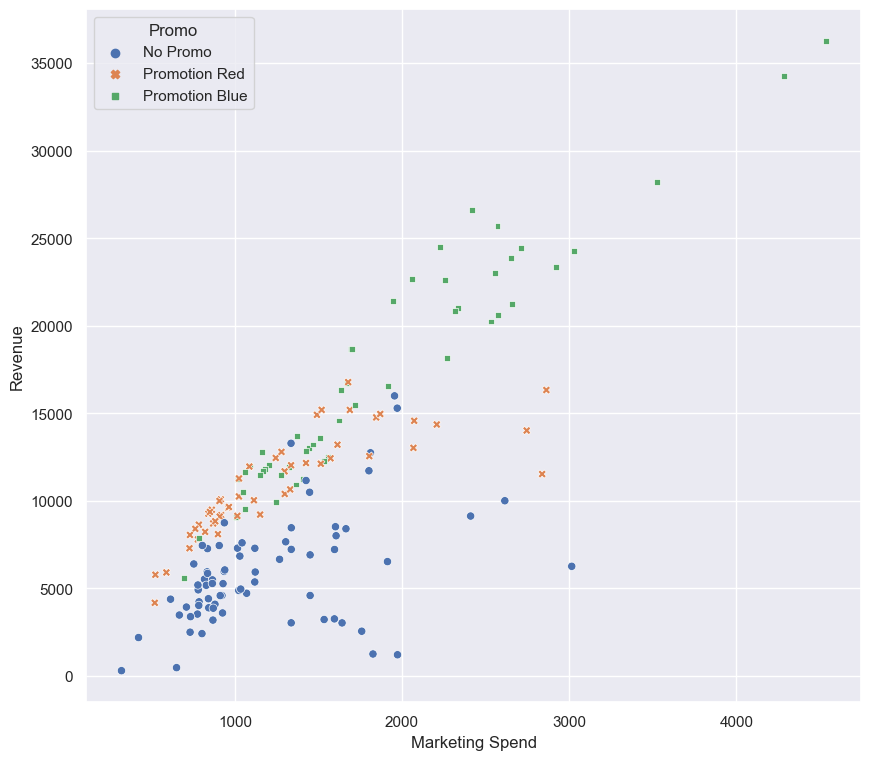

In [48]:
# investigation applying promo
sns.scatterplot(x="Marketing Spend",
               y="Revenue",
                hue="Promo",
                style="Promo",
               data=raw_data)
plt.show()

## 7. lmPlots (Linear regression)
relationship between two quantitative variables

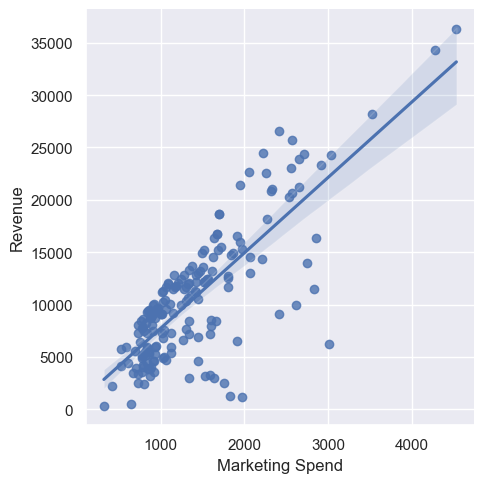

In [50]:
# Relationship between Marketing Spend and Revenue
sns.lmplot(x="Marketing Spend",
          y="Revenue",
           data=raw_data
          )
plt.show()

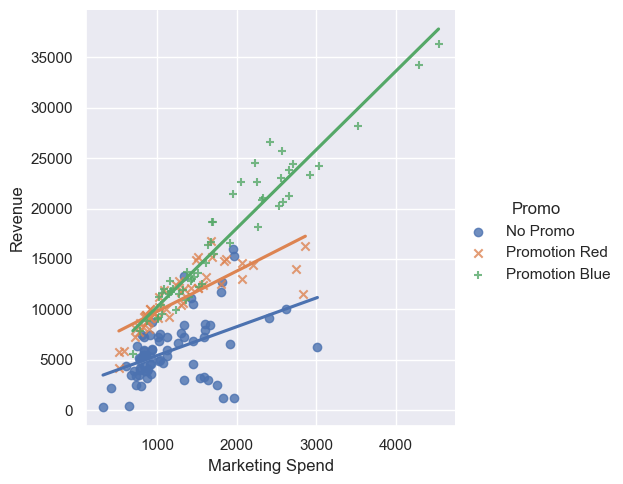

In [53]:
# remove errorbar, add hue & Style
sns.lmplot(x="Marketing Spend",
          y="Revenue",
           hue="Promo",
           ci=False,
           markers=["o", "x", "+"],
           data=raw_data
          )
plt.show()

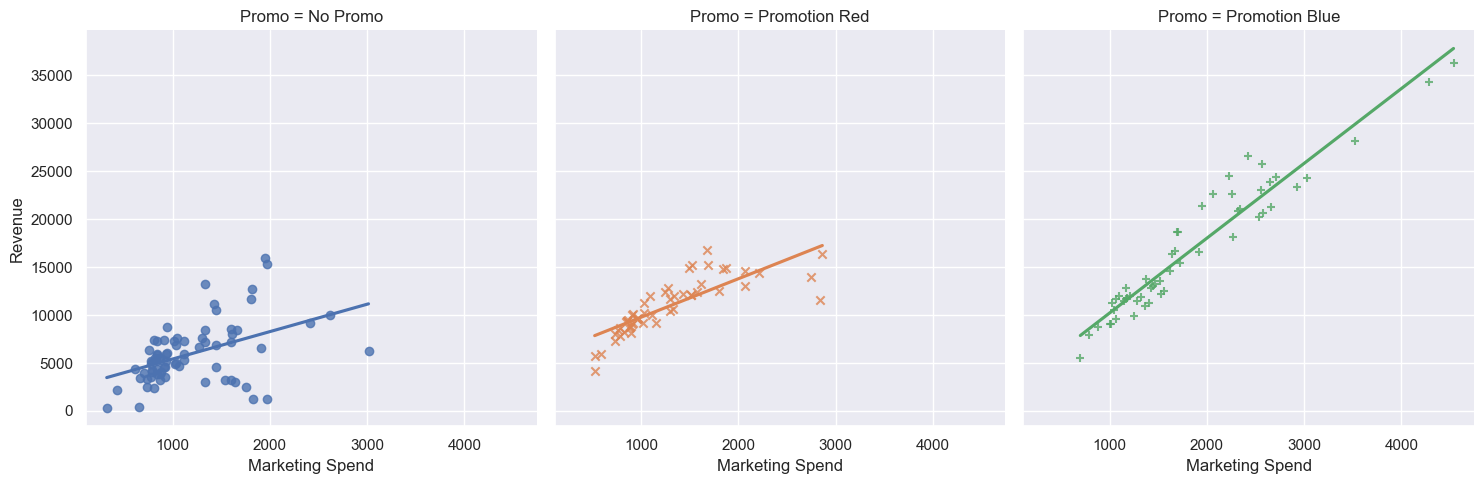

In [54]:
# Relationship between Marketing Spend and Revenue - by column
sns.lmplot(x="Marketing Spend",
          y="Revenue",
           col="Promo",
           hue="Promo",
           ci=False,
           markers=["o", "x", "+"],
           data=raw_data
          )
plt.show()

## 8. Pairplots
Pairplot uses to get the relation between each and every variable present in Pandas DataFrame. It works like a seaborn scatter plot but it plot only two variables plot and sns paiplot plot the pairwise plot of multiple features/variable in a grid format. 

In [55]:
# running on specific columns - adding hue

raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

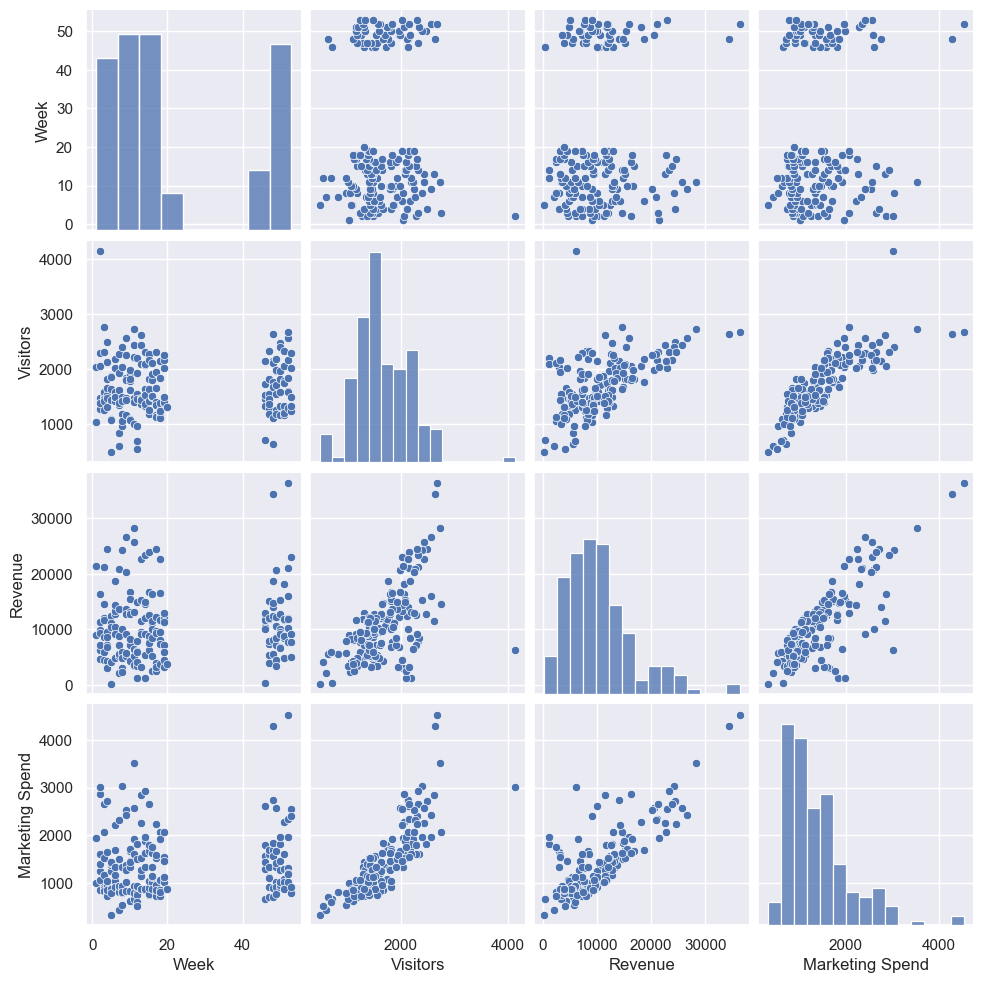

In [58]:
sns.pairplot(raw_data[['Week', 
                       'Visitors',
                      'Revenue',
                      'Marketing Spend']])
plt.show()

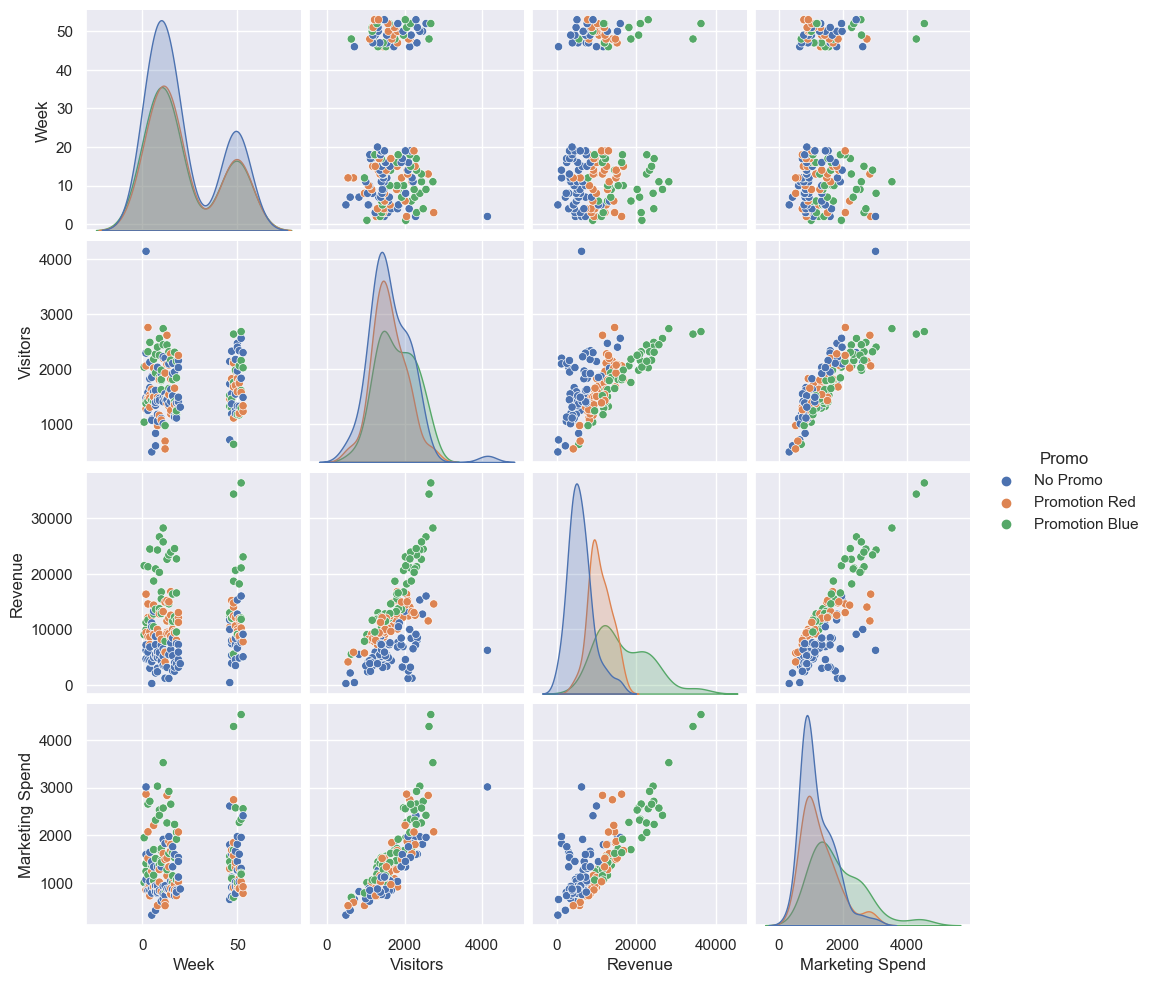

In [60]:
sns.pairplot(raw_data[['Week', 
                       'Visitors',
                      'Revenue',
                      'Marketing Spend',"Promo"]],
            hue="Promo")
plt.show()

### More on Pairplots:
https://seaborn.pydata.org/generated/seaborn.pairplot.html

## 10. JoinPlots
#### Draw a plot of two variables with bivariate and univariate graphs.

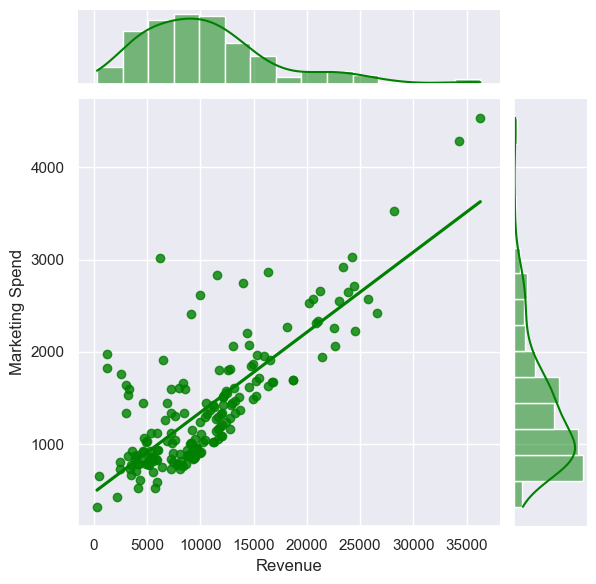

In [66]:
# Revenue vs marketing Spend Relationship with 
sns.jointplot(x="Revenue",
             y="Marketing Spend",
              kind="reg",
              color="green",
              ci=False,
            data=raw_data)
plt.show()

## 11. Heat Map

                  Revenue  Marketing Spend  Visitors
Revenue          1.000000         0.790425  0.573842
Marketing Spend  0.790425         1.000000  0.824810
Visitors         0.573842         0.824810  1.000000


<AxesSubplot:>

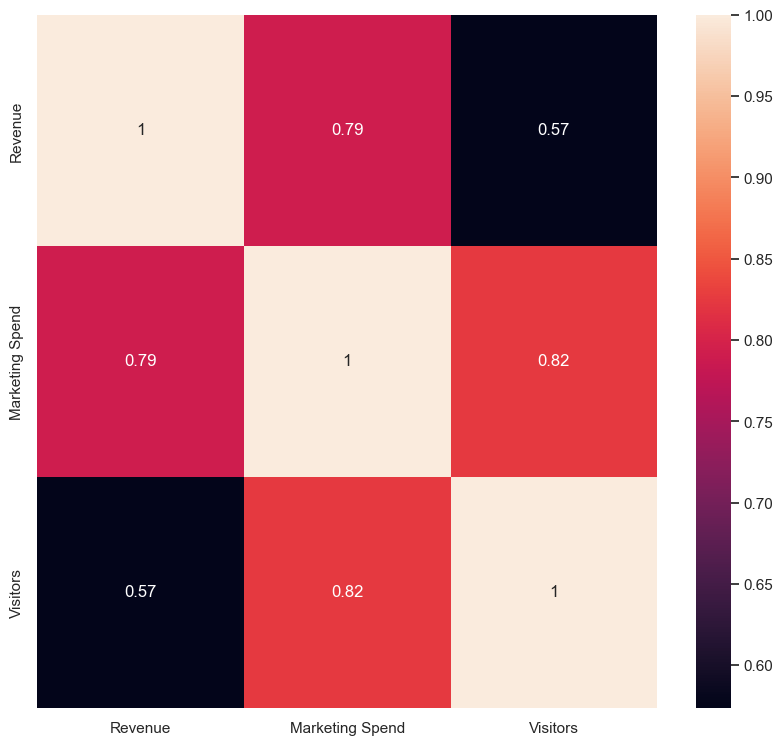

In [70]:
corr=raw_data[['Revenue', 
               'Marketing Spend', 
               'Visitors']].corr()
print(corr)
sns.heatmap(corr, annot=True)

### More details for Heatmaps here:
https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Subplots

<AxesSubplot:xlabel='Week', ylabel='Revenue'>

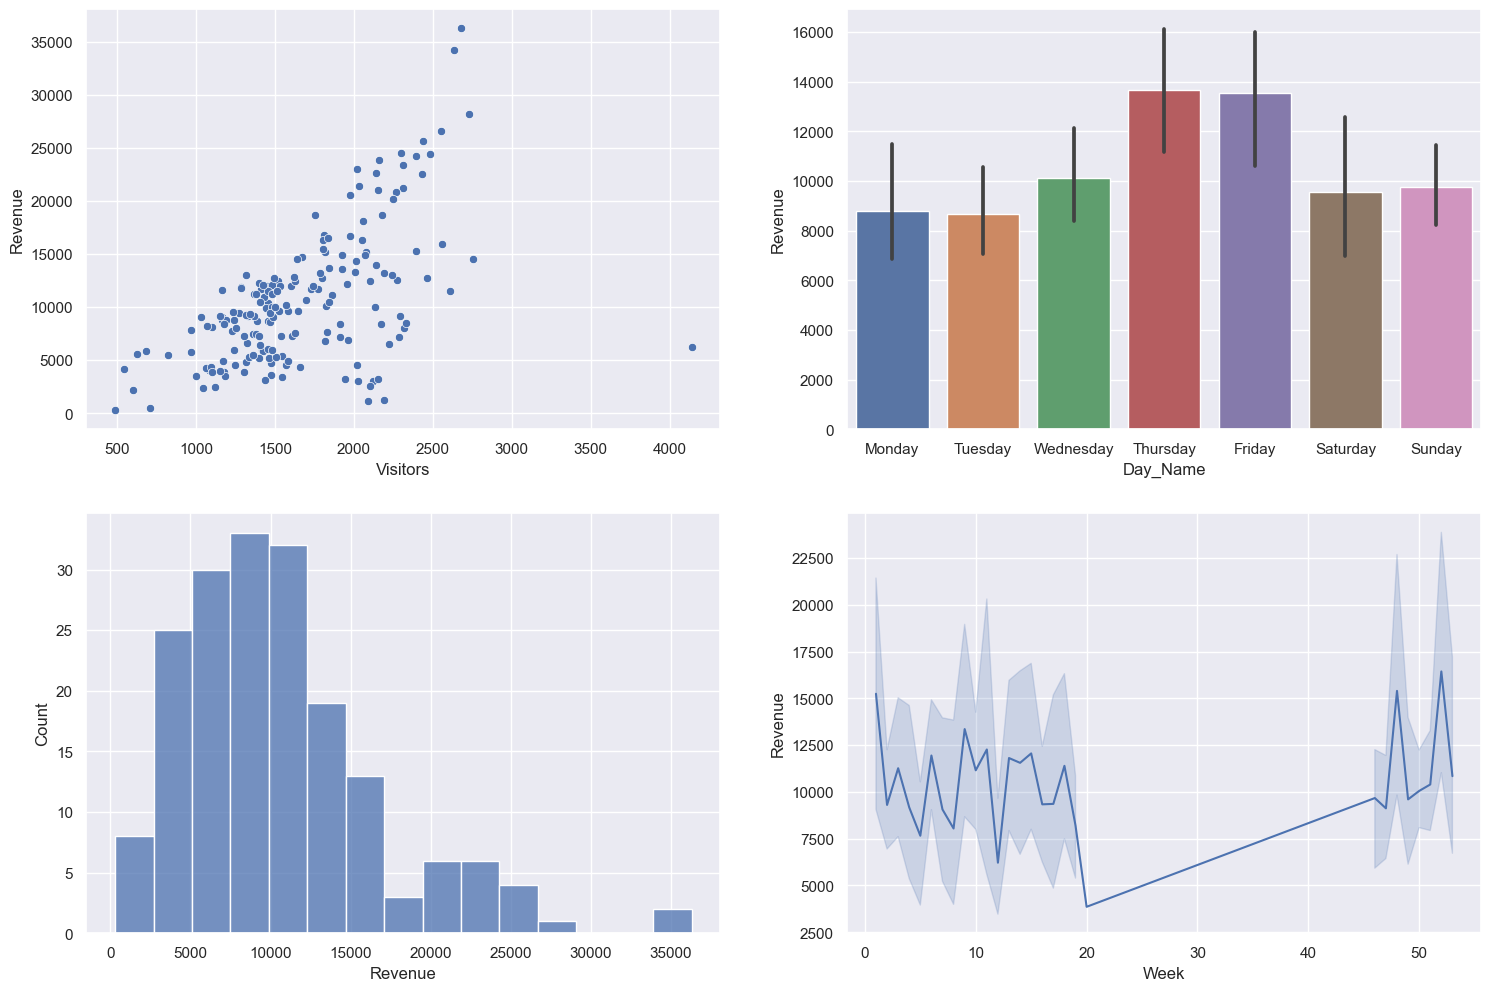

In [74]:
sns.set(rc={'figure.figsize':(18,12)})
fig,axes=plt.subplots(2,2)
#create scatter plot for Revenue vs Visitors 
sns.scatterplot(y="Revenue", 
           x="Visitors",
           data= raw_data,
           ax=axes[0,0])

# Create bar plot for day_name vs Revenue
sns.barplot(x="Day_Name", y="Revenue",
           data=raw_data, ax=axes[0,1])

# Create histogram for Revenue 
sns.histplot(x="Revenue", data= raw_data, ax=axes[1,0])

# Create line plot for Week vs Revenue
sns.lineplot(x="Week", y="Revenue", data=raw_data,
            ax=axes[1,1])

